In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# データをロードする FordA
# TSVデータを読み取る
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

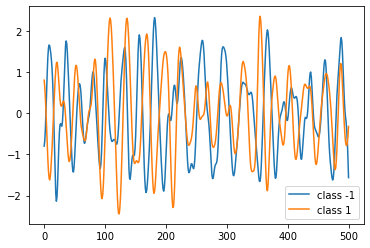

In [4]:
# データを視覚化する
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [5]:
# データを標準化する
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [6]:
num_classes = len(np.unique(y_train))

In [7]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [8]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [15]:
# モデルを構築する
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [16]:
# モデルをトレーニング
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500


2022-06-03 18:39:00.217943: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


90/90 [==============================] - 5s 49ms/step - loss: 0.5588 - sparse_categorical_accuracy: 0.7000 - val_loss: 0.8114 - val_sparse_categorical_accuracy: 0.4813 - lr: 0.0010
Epoch 2/500
90/90 [==============================] - 5s 54ms/step - loss: 0.4571 - sparse_categorical_accuracy: 0.7722 - val_loss: 0.8408 - val_sparse_categorical_accuracy: 0.4813 - lr: 0.0010
Epoch 3/500
90/90 [==============================] - 4s 42ms/step - loss: 0.4369 - sparse_categorical_accuracy: 0.7861 - val_loss: 0.7452 - val_sparse_categorical_accuracy: 0.4813 - lr: 0.0010
Epoch 4/500
90/90 [==============================] - 5s 51ms/step - loss: 0.4137 - sparse_categorical_accuracy: 0.7882 - val_loss: 0.7293 - val_sparse_categorical_accuracy: 0.4951 - lr: 0.0010
Epoch 5/500
90/90 [==============================] - 4s 47ms/step - loss: 0.4365 - sparse_categorical_accuracy: 0.7844 - val_loss: 0.8380 - val_sparse_categorical_accuracy: 0.4938 - lr: 0.0010
Epoch 6/500
90/90 [============================

90/90 [==============================] - 5s 51ms/step - loss: 0.2452 - sparse_categorical_accuracy: 0.9000 - val_loss: 0.3520 - val_sparse_categorical_accuracy: 0.8197 - lr: 0.0010
Epoch 44/500
90/90 [==============================] - 5s 50ms/step - loss: 0.2638 - sparse_categorical_accuracy: 0.8868 - val_loss: 0.3048 - val_sparse_categorical_accuracy: 0.8558 - lr: 0.0010
Epoch 45/500
90/90 [==============================] - 5s 50ms/step - loss: 0.2554 - sparse_categorical_accuracy: 0.8944 - val_loss: 0.2984 - val_sparse_categorical_accuracy: 0.8585 - lr: 0.0010
Epoch 46/500
90/90 [==============================] - 5s 51ms/step - loss: 0.2571 - sparse_categorical_accuracy: 0.8934 - val_loss: 0.2663 - val_sparse_categorical_accuracy: 0.8946 - lr: 0.0010
Epoch 47/500
90/90 [==============================] - 4s 49ms/step - loss: 0.2570 - sparse_categorical_accuracy: 0.8976 - val_loss: 0.3514 - val_sparse_categorical_accuracy: 0.8141 - lr: 0.0010
Epoch 48/500
90/90 [=======================

90/90 [==============================] - 4s 45ms/step - loss: 0.2011 - sparse_categorical_accuracy: 0.9184 - val_loss: 0.2372 - val_sparse_categorical_accuracy: 0.9057 - lr: 0.0010
Epoch 86/500
90/90 [==============================] - 4s 44ms/step - loss: 0.2036 - sparse_categorical_accuracy: 0.9167 - val_loss: 0.3208 - val_sparse_categorical_accuracy: 0.8558 - lr: 0.0010
Epoch 87/500
90/90 [==============================] - 4s 45ms/step - loss: 0.1915 - sparse_categorical_accuracy: 0.9281 - val_loss: 0.2707 - val_sparse_categorical_accuracy: 0.8669 - lr: 0.0010
Epoch 88/500
90/90 [==============================] - 4s 44ms/step - loss: 0.2027 - sparse_categorical_accuracy: 0.9174 - val_loss: 0.4046 - val_sparse_categorical_accuracy: 0.7961 - lr: 0.0010
Epoch 89/500
90/90 [==============================] - 4s 44ms/step - loss: 0.2071 - sparse_categorical_accuracy: 0.9149 - val_loss: 0.2712 - val_sparse_categorical_accuracy: 0.8766 - lr: 0.0010
Epoch 90/500
90/90 [=======================

90/90 [==============================] - 4s 47ms/step - loss: 0.1194 - sparse_categorical_accuracy: 0.9587 - val_loss: 0.1553 - val_sparse_categorical_accuracy: 0.9320 - lr: 0.0010
Epoch 128/500
90/90 [==============================] - 4s 45ms/step - loss: 0.0991 - sparse_categorical_accuracy: 0.9646 - val_loss: 0.3509 - val_sparse_categorical_accuracy: 0.8530 - lr: 0.0010
Epoch 129/500
90/90 [==============================] - 4s 45ms/step - loss: 0.1177 - sparse_categorical_accuracy: 0.9556 - val_loss: 1.1968 - val_sparse_categorical_accuracy: 0.6616 - lr: 0.0010
Epoch 130/500
90/90 [==============================] - 5s 54ms/step - loss: 0.0966 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.2836 - val_sparse_categorical_accuracy: 0.8627 - lr: 0.0010
Epoch 131/500
90/90 [==============================] - 4s 48ms/step - loss: 0.0950 - sparse_categorical_accuracy: 0.9663 - val_loss: 0.3661 - val_sparse_categorical_accuracy: 0.8294 - lr: 0.0010
Epoch 132/500
90/90 [==================

90/90 [==============================] - 4s 45ms/step - loss: 0.0706 - sparse_categorical_accuracy: 0.9771 - val_loss: 0.1107 - val_sparse_categorical_accuracy: 0.9598 - lr: 0.0010
Epoch 170/500
90/90 [==============================] - 4s 46ms/step - loss: 0.0766 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.2315 - val_sparse_categorical_accuracy: 0.9043 - lr: 0.0010
Epoch 171/500
90/90 [==============================] - 4s 45ms/step - loss: 0.0917 - sparse_categorical_accuracy: 0.9681 - val_loss: 0.6593 - val_sparse_categorical_accuracy: 0.7503 - lr: 0.0010
Epoch 172/500
90/90 [==============================] - 4s 45ms/step - loss: 0.0918 - sparse_categorical_accuracy: 0.9715 - val_loss: 0.4317 - val_sparse_categorical_accuracy: 0.8350 - lr: 0.0010
Epoch 173/500
90/90 [==============================] - 4s 46ms/step - loss: 0.0825 - sparse_categorical_accuracy: 0.9722 - val_loss: 0.1811 - val_sparse_categorical_accuracy: 0.9417 - lr: 0.0010
Epoch 174/500
90/90 [==================

Epoch 211/500
90/90 [==============================] - 4s 44ms/step - loss: 0.0616 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.1594 - val_sparse_categorical_accuracy: 0.9515 - lr: 5.0000e-04
Epoch 212/500
90/90 [==============================] - 4s 44ms/step - loss: 0.0631 - sparse_categorical_accuracy: 0.9795 - val_loss: 0.1069 - val_sparse_categorical_accuracy: 0.9598 - lr: 5.0000e-04
Epoch 213/500
90/90 [==============================] - 4s 43ms/step - loss: 0.0590 - sparse_categorical_accuracy: 0.9806 - val_loss: 0.1120 - val_sparse_categorical_accuracy: 0.9612 - lr: 5.0000e-04
Epoch 214/500
90/90 [==============================] - 4s 44ms/step - loss: 0.0591 - sparse_categorical_accuracy: 0.9812 - val_loss: 0.2188 - val_sparse_categorical_accuracy: 0.9182 - lr: 5.0000e-04
Epoch 215/500
90/90 [==============================] - 4s 47ms/step - loss: 0.0636 - sparse_categorical_accuracy: 0.9806 - val_loss: 0.3222 - val_sparse_categorical_accuracy: 0.8946 - lr: 5.0000e-04
Epoch

90/90 [==============================] - 4s 44ms/step - loss: 0.0472 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0981 - val_sparse_categorical_accuracy: 0.9612 - lr: 1.2500e-04
Epoch 253/500
90/90 [==============================] - 4s 44ms/step - loss: 0.0489 - sparse_categorical_accuracy: 0.9854 - val_loss: 0.1144 - val_sparse_categorical_accuracy: 0.9653 - lr: 1.2500e-04
Epoch 254/500
90/90 [==============================] - 4s 46ms/step - loss: 0.0484 - sparse_categorical_accuracy: 0.9865 - val_loss: 0.1005 - val_sparse_categorical_accuracy: 0.9584 - lr: 1.2500e-04
Epoch 255/500
90/90 [==============================] - 4s 45ms/step - loss: 0.0524 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.1012 - val_sparse_categorical_accuracy: 0.9695 - lr: 1.2500e-04
Epoch 256/500
90/90 [==============================] - 4s 44ms/step - loss: 0.0488 - sparse_categorical_accuracy: 0.9865 - val_loss: 0.0970 - val_sparse_categorical_accuracy: 0.9639 - lr: 1.2500e-04
Epoch 257/500
90/90

90/90 [==============================] - 4s 47ms/step - loss: 0.0432 - sparse_categorical_accuracy: 0.9865 - val_loss: 0.0983 - val_sparse_categorical_accuracy: 0.9681 - lr: 1.0000e-04
Epoch 294/500
90/90 [==============================] - 4s 48ms/step - loss: 0.0467 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.1010 - val_sparse_categorical_accuracy: 0.9653 - lr: 1.0000e-04
Epoch 295/500
90/90 [==============================] - 4s 46ms/step - loss: 0.0430 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.0999 - val_sparse_categorical_accuracy: 0.9681 - lr: 1.0000e-04
Epoch 296/500
90/90 [==============================] - 4s 45ms/step - loss: 0.0474 - sparse_categorical_accuracy: 0.9875 - val_loss: 0.1014 - val_sparse_categorical_accuracy: 0.9667 - lr: 1.0000e-04
Epoch 297/500
90/90 [==============================] - 4s 45ms/step - loss: 0.0457 - sparse_categorical_accuracy: 0.9854 - val_loss: 0.1120 - val_sparse_categorical_accuracy: 0.9653 - lr: 1.0000e-04
Epoch 298/500
90/90

In [17]:
# テストデータでモデルを評価する
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

42/42 [==============================] - 0s 9ms/step - loss: 0.0961 - sparse_categorical_accuracy: 0.9697
Test accuracy 0.9696969985961914
Test loss 0.09609353542327881


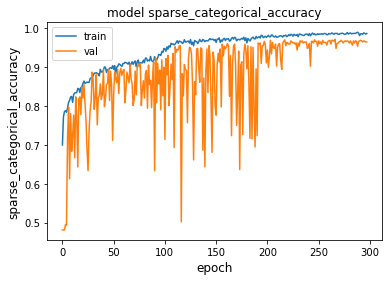

In [18]:
# モデルのトレーニングと検証の損失をプロット
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_"+metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()